In [176]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import numpy as np
cmap = cm.spring

In [17]:
a = 1
q = 1

Takes in the charge $q$ and location of the charge $\vec{R}$ - returns the electric field at an arbitrary point $\vec{X}$.

In [64]:
def elec_field(q, R, x, y):
    rx = R[0]; ry = R[1]
    return (q/((x-rx)**2+(y-ry)**2)**(3/2))*np.array([x-rx, y-ry])

Defines the specific charge arrangement.

In [68]:
def charge_arrangement(x, y):
    pnt_1, q1 = np.array([0, a]), q
    pnt_2, q2 = np.array([0, -a]), q
    pnt_3, q3 = np.array([a, 0]), -q
    pnt_4, q4 = np.array([-a, 0]), -q
    
    return (elec_field(q1, pnt_1, x, y) + elec_field(q2, pnt_2, x, y) + 
        elec_field(q3, pnt_3, x, y) + elec_field(q4, pnt_4, x, y) )

Normalize the charge arrangement.

In [148]:
def norm_charge_arrangement(x, y):
    return charge_arrangement(x, y)/np.linalg.norm(charge_arrangement(x, y), axis=1)

Define a meshgrid and compute the vector field and strength of the vector field.

In [153]:
X, Y = np.meshgrid(np.arange(-2*a-0.1, 2*a+0.1, .2), np.arange(-2*a-0.1, 2*a+0.1 , .2))
U, V = charge_arrangement(X, Y)

norm = np.sqrt(U**2+V**2) # strength of the field
U= U/norm; V=V/norm # normalized vectors

Do an initial plot.

Text(0, 0.5, '$y/a$')

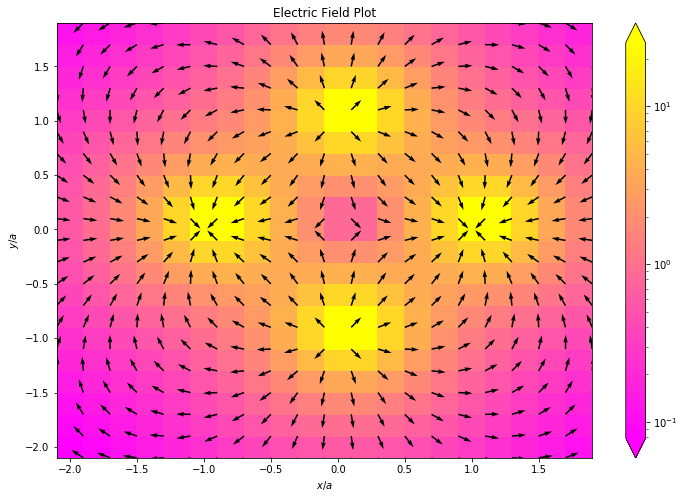

In [222]:
fig, ax = plt.subplots(figsize=(12,8))

cs1 = ax.pcolor(X, Y, norm, cmap=cmap, norm=colors.LogNorm(vmin=norm.min(), vmax=norm.max()/2))
fig.colorbar(cs1, ax=ax, extend='both')

Q = ax.quiver(X, Y, U, V, units='width')
ax.set_title('Electric Field Plot')
ax.set_xlabel('$x/a$')
ax.set_ylabel('$y/a$')